# Tema

## Data

In [1]:
import newspaper
import pandas as pd
from tqdm import tqdm

data = pd.read_csv("data/contenido_2023_04_05_matriz_not_julia.csv")
data

,Unnamed: 0.1,Unnamed: 0,N,n_periodico,enlace,Medio,año,Fecha,Nombreperiodista,Nombreperiodista_A,...,@25perspectiva,@25piedefoto,@26ge3ero1oto,@26perspectiva,@26piedefoto,@27ge3ero1oto,@27perspectiva,@27piedefoto,contenido,contenido_clean
0,3246,3246,3162,357,https://elpais.com/tecnologia/2018/10/08/actua...,4,2018,9/10/2018,EVGENY MOROZOV,EVGENY MOROZOV,...,,,,,,,,,En medio de la angustia generalizada que provo...,medio angustia generalizado provocar inevitabl...
1,3615,3615,3572,767,https://elpais.com/tecnologia/2018/02/23/actua...,4,2018,25/2/2018,SANTIAGO MILLÁN ALONSO Y RAMÓN MUÑOZ,SANTIAGO MILLÁN ALONSO Y RAMÓN MUÑOZ,...,,,,,,,,,"Telefónica ya tiene en marcha Aura, su mayor a...",telefónica marcha aura mayor apuesta tecnoló...
2,882,882,513,351,https://www.lavanguardia.com/tecnologia/202010...,2,2020,22/10/2020,JUDITH VIVES,JUDITH VIVES,...,,,,,,,,,Si hay una herramienta que ha servido para man...,si herramienta servir manipular imagen pasado ...
3,1322,1322,960,798,https://www.lavanguardia.com/tecnologia/201806...,2,2018,12/6/2018,JUDITH VIVES,JUDITH VIVES,...,,,,,,,,,Uber desarrollará una tecnología basada en la ...,uber desarrollar tecnología basado inteligenci...
4,1157,1157,789,627,https://www.lavanguardia.com/tecnologia/201905...,2,2019,18/5/2019,ALBERTO BARBIERI,ALBERTO BARBIERI,...,,,,,,,,,"El pasado 28 de enero, la revista Motherboard ...",pasado 28 enero revista motherboard publicar...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,3716,3716,3680,875,https://elpais.com/tecnologia/2017/10/31/actua...,4,2017,4/11/2017,JOSÉ MENDIOLA ZURIARRAIN,JOSÉ MENDIOLA ZURIARRAIN,...,,,,,,,,,La reciente llegada del Pixel 2 XL de Google n...,reciente llegada pixel 2 xl google hacer sino ...
7996,3279,3279,3202,397,https://elpais.com/tecnologia/2018/08/31/actua...,4,2018,31/09/2018,JAVIER SALAS,JAVIER SALAS,...,,,,,,,,,"""¿Te importaría salir de la habitación, por fa...",importar salir habitación favor inespera...
7997,2310,2310,2128,1131,https://www.elmundo.es/eme/diseno/2018/06/14/5...,3,2018,14/6/2018,JUANJO BECERRA,JUANJO BECERRA,...,,,,,,,,,Miren la imagen de la derecha. verán retratado...,mirar imagen derecha ver retratado varón 30 ...
7998,3261,3261,3182,377,https://elpais.com/tecnologia/2018/09/16/actua...,4,2018,17/9/2018,JORDI PÉREZ COLOMÉ,JORDI PÉREZ COLOMÉ,...,,,,,,,,,Un ciudadano acude a una comisaría a presentar...,ciudadano acudir comisaría presentar denuncia ...


In [2]:
# Eliminar filas donde "contenido" esté vacío o NaN
data = data.dropna(subset=['contenido'])

# Verificar que ya no haya valores NaN
print(data['contenido'].isna().sum())


0


## Labels

In [3]:
label2id = {
    "Otros": 0,
    "Economía": 1, 
    "Expertos/as en IA": 2, 
    "Política": 3, 
    "Empresa": 4, 
    "Robótica": 5,
    "Aplicaciones / software": 6, 
    "Comunicación": 7, 
    "Investigación": 8, 
    "Algoritmo": 9,
    "Sesgos de género": 10, 
    "Sesgos de género y raza": 11, 
    "Premio": 12, 
    "Educación/cultura": 13,
}

id2label = {
    0: "Otros",
    1: "Economía", 
    2: "Expertos/as en IA", 
    3: "Política", 
    4: "Empresa", 
    5: "Robótica",
    6: "Aplicaciones / software", 
    7: "Comunicación", 
    8: "Investigación", 
    9: "Algoritmo",
    10: "Sesgos de género", 
    11: "Sesgos de género y raza", 
    12: "Premio",
    13: "Educación/cultura",
}



/tmp/ipykernel_17054/2927592828.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=tema_counts.index-1, y=tema_counts.values, palette="viridis")


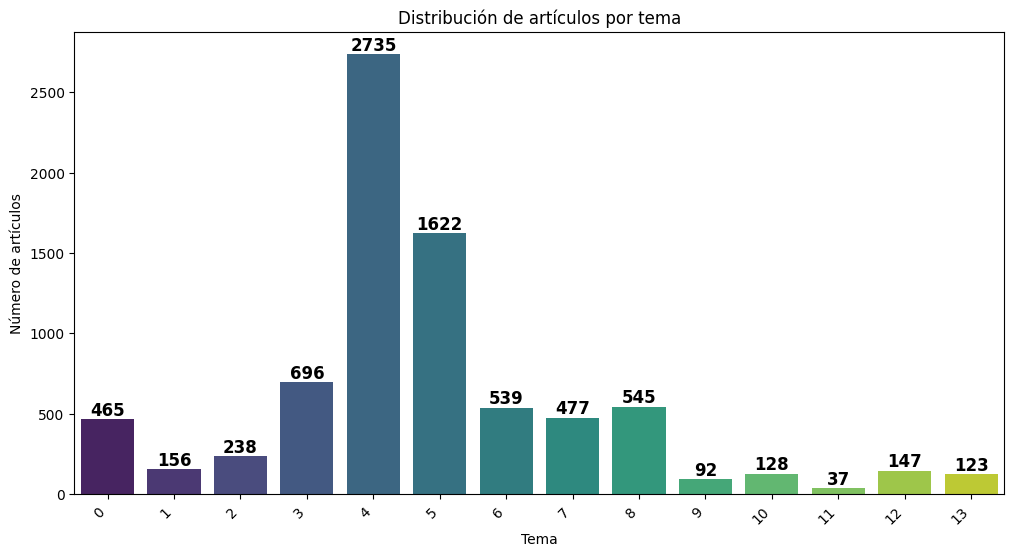

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Contar la cantidad de artículos por tema
tema_counts = data['Tema'].value_counts()

# Crear el gráfico
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=tema_counts.index-1, y=tema_counts.values, palette="viridis")

# Agregar los números en cada barra con la posición correcta
for p in ax.patches:
    ax.annotate(f"{int(p.get_height())}", 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', 
                fontsize=12, fontweight='bold', color='black')

# Rotar las etiquetas del eje x
plt.xticks(rotation=45, ha="right")

# Agregar títulos y etiquetas
plt.xlabel("Tema")
plt.ylabel("Número de artículos")
plt.title("Distribución de artículos por tema")

# Mostrar el gráfico
plt.show()


### Balanceo de clases

/tmp/ipykernel_17054/102021399.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=y_train_resampled.value_counts().index,


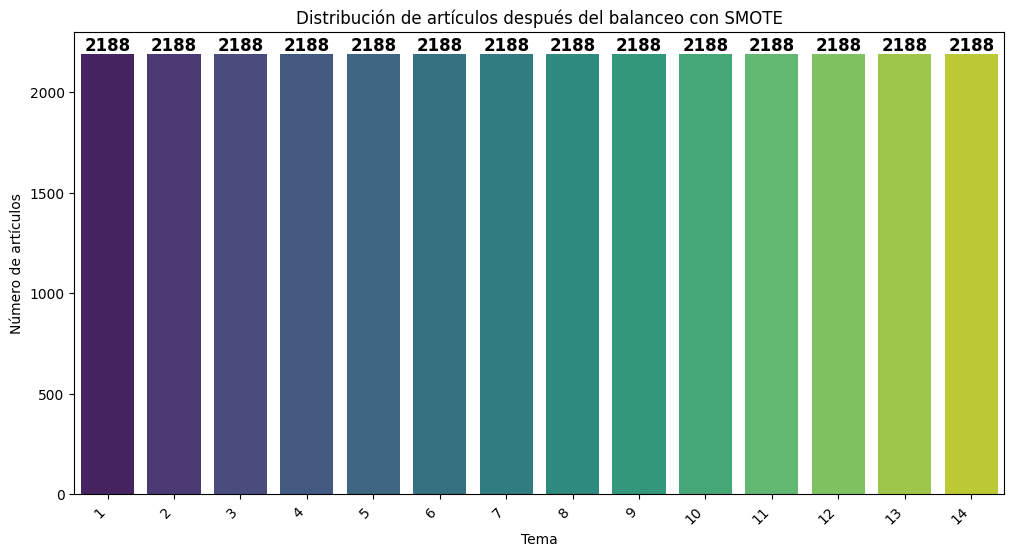

Distribución en entrenamiento después del balanceo:
Tema
9     2188
3     2188
7     2188
4     2188
5     2188
2     2188
6     2188
8     2188
1     2188
10    2188
12    2188
13    2188
14    2188
11    2188
Name: count, dtype: int64

Distribución en prueba (sin cambios):
Tema
5     547
6     324
4     139
9     109
7     108
8      96
1      93
3      48
2      31
13     29
11     26
14     25
10     18
12      7
Name: count, dtype: int64


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE

# 🔹 1. Dividir en entrenamiento y prueba antes del balanceo
X_train, X_test, y_train, y_test = train_test_split(
    data['contenido_clean'], data['Tema'], test_size=0.2, random_state=42, stratify=data['Tema']
)

# 🔹 2. Convertir el texto en una representación numérica con TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)  # Limita a 5000 características para eficiencia
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)  # Solo transformamos el conjunto de prueba

# 🔹 3. Aplicar SMOTE al conjunto de entrenamiento vectorizado
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_tfidf, y_train)

# 🔹 4. Graficar la distribución después del balanceo
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=y_train_resampled.value_counts().index, 
                 y=y_train_resampled.value_counts().values, palette="viridis")

# Agregar números en cada barra
for p in ax.patches:
    ax.annotate(f"{int(p.get_height())}", 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

plt.xticks(rotation=45, ha="right")
plt.xlabel("Tema")
plt.ylabel("Número de artículos")
plt.title("Distribución de artículos después del balanceo con SMOTE")
plt.show()

# 🔹 5. Confirmar nuevas distribuciones
print("Distribución en entrenamiento después del balanceo:")
print(y_train_resampled.value_counts())

print("\nDistribución en prueba (sin cambios):")
print(y_test.value_counts())


## Train

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

# Crear pipeline de vectorización y modelo
model = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000)),
    ('clf', LogisticRegression(max_iter=1000))
])

# Entrenar modelo
model.fit(X_train, y_train)

# Evaluar modelo
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=id2label.values()))


                         precision    recall  f1-score   support

                  Otros       0.78      0.77      0.78        93
               Economía       1.00      0.65      0.78        31
      Expertos/as en IA       0.86      0.67      0.75        48
               Política       0.70      0.73      0.72       139
                Empresa       0.94      0.98      0.96       547
               Robótica       0.86      0.95      0.90       324
Aplicaciones / software       0.63      0.74      0.68       108
           Comunicación       0.84      0.61      0.71        96
          Investigación       0.99      0.88      0.93       109
              Algoritmo       1.00      0.83      0.91        18
       Sesgos de género       1.00      0.92      0.96        26
Sesgos de género y raza       1.00      0.14      0.25         7
                 Premio       0.92      0.76      0.83        29
      Educación/cultura       0.78      0.56      0.65        25

               accuracy

In [8]:
y_train_pred = model.predict(X_train)
print(classification_report(y_train, y_train_pred, target_names=id2label.values()))

                         precision    recall  f1-score   support

                  Otros       0.93      0.90      0.92       372
               Economía       1.00      0.63      0.77       125
      Expertos/as en IA       0.93      0.87      0.90       190
               Política       0.84      0.90      0.87       557
                Empresa       0.96      0.99      0.98      2188
               Robótica       0.90      0.97      0.93      1298
Aplicaciones / software       0.85      0.86      0.86       431
           Comunicación       0.94      0.82      0.88       381
          Investigación       0.99      0.94      0.97       436
              Algoritmo       1.00      0.77      0.87        74
       Sesgos de género       1.00      0.86      0.93       102
Sesgos de género y raza       1.00      0.33      0.50        30
                 Premio       0.93      0.88      0.90       118
      Educación/cultura       0.93      0.79      0.85        98

               accuracy

## Explicabilidad

### Por artículo

In [ ]:
import numpy as np
from lime.lime_text import LimeTextExplainer

explainer = LimeTextExplainer(class_names=list(id2label.values()))

def explain_instance_predicted_class(text, num_words=20):
    # Obtener la clase predicha por el modelo
    predicted_class = np.argmax(model.predict_proba([text]))

    exp = explainer.explain_instance(
        text, 
        model.predict_proba, 
        num_features=num_words,  # Número de palabras a mostrar
        labels=[predicted_class]  # Explicar solo la clase predicha
    )

    print(f"Clase predicha: {id2label[predicted_class]}")  # Mostrar nombre de la clase
    return exp.show_in_notebook()

# Explicar un texto con su clase predicha
explain_instance_predicted_class(X_test.iloc[3])


### Por clase

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def explain_instance_all_classes_heatmap(text, num_words=5):
    # Obtener probabilidades del modelo
    proba = model.predict_proba([text])[0]
    predicted_class = np.argmax(proba)  # Clase predicha

    # Generar la explicación con LIME
    exp = explainer.explain_instance(
        text, 
        model.predict_proba, 
        num_features=num_words,
        labels=list(range(len(id2label)))  # Explicar TODAS las clases
    )

    print(f"Clase predicha: {id2label[predicted_class]}")
    print(f"Probabilidades de cada clase:")
    for i, prob in enumerate(proba):
        print(f"  {id2label[i]}: {prob:.2%}")

    # Crear una matriz donde cada fila es una palabra y cada columna una clase
    word_importance = {}

    for label in range(len(id2label)):
        exp_list = exp.as_list(label=label)  # Explicación de la clase actual
        for word, weight in exp_list:
            if word not in word_importance:
                word_importance[word] = [0] * len(id2label)  # Inicializar todas las clases en 0
            word_importance[word][label] = weight  # Asignar peso

    # Convertir a matriz para seaborn
    words = list(word_importance.keys())
    importance_matrix = np.array(list(word_importance.values()))

    # Crear el heatmap
    plt.figure(figsize=(12, len(words) * 0.5))
    sns.heatmap(
        importance_matrix, 
        xticklabels=[id2label[i] for i in range(len(id2label))], 
        yticklabels=words, 
        cmap="coolwarm", 
        annot=True, 
        fmt=".2f"
    )
    plt.xlabel("Clases")
    plt.ylabel("Palabras")
    plt.title(f"Importancia de palabras en todas las clases - Texto seleccionado")
    plt.show()

# Explicar un texto con Heatmap para todas las clases
explain_instance_all_classes_heatmap(X_test.iloc[3])


### Con mayor confianza

In [ ]:
# Obtener las predicciones de todo X_test
probs = model.predict_proba(X_test)

# Obtener la confianza más alta por cada texto
confidence_scores = np.max(probs, axis=1)

# Ordenar los textos por confianza descendente
top_indices = np.argsort(confidence_scores)[::-1][:5]  # Top 5 textos mejor clasificados

# Explicar los mejores clasificados
for i in top_indices:
    print(f"\nExplicando texto {i} con confianza {confidence_scores[i]:.2f}")
    explain_instance_predicted_class(X_test.iloc[i])
